In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import *
sns.set()

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

#train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
train_sampled_all = glob.glob('C:/Users/Asus/Desktop/colab/train_sampled_all_220.csv')

# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
#test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

test_unsampled_all = glob.glob('C:/Users/Asus/Desktop/colab/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  C:/Users/Asus/Desktop/colab/train_sampled_all_220.csv
Loading  C:/Users/Asus/Desktop/colab/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


# selecting test and train data and normalize

In [2]:
X_train = train_values[:,:-2]              # takes data without 2 last array cells(patient number and label)
X_test = test_values[:,:-2]                # [:,:-2] means first dimension fully and second from first to (l-2)

y_train = train_values[:,-2]              # labels of train data
y_test = test_values[:,-2]                # labels of test data

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

#print(X_train)

# detecting not normal labeled data 

In [3]:
X_test_noN = np.where(test_values[:,-2]==1.0)[0]
print(X_test_noN.shape)
X_test = np.delete(X_test, X_test_noN,0)
print(X_test.shape)

y_test_noN = np.where(test_values[:,-2]==1.0)[0]
print(y_test_noN.shape)
y_test = np.delete(y_test, y_test_noN,0)
print(y_test.shape)

(28703,)
(9160, 220)
(28703,)
(9160,)


In [4]:
N_vals = np.where(test_values[:,-2]==1)[0]
new_test = np.delete(test_values,N_vals[:27000],axis=0)
print(new_test.shape)

(10863, 222)


# PCA analyse for test data

In [5]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=50,random_state=42).fit_transform(new_test[:,:-2])

Text(0.5, 1.0, 'PCA')

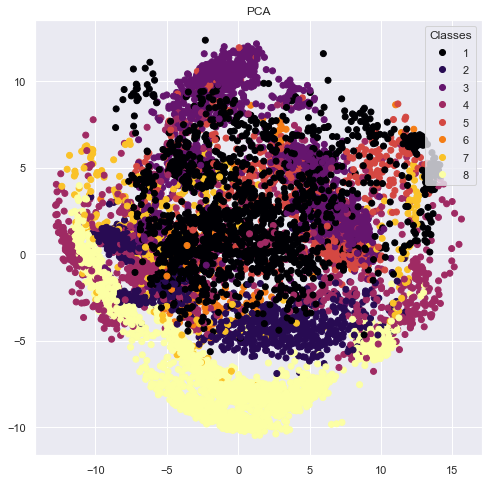

In [6]:
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=new_test[:,-2], cmap='inferno')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA')

# TSNE for pca (dimension reduction)

In [7]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2,random_state=42,perplexity=10, verbose=2).fit_transform(x_pca)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10863 samples in 0.137s...
[t-SNE] Computed neighbors for 10863 samples in 2.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10863
[t-SNE] Computed conditional probabilities for sample 2000 / 10863
[t-SNE] Computed conditional probabilities for sample 3000 / 10863
[t-SNE] Computed conditional probabilities for sample 4000 / 10863
[t-SNE] Computed conditional probabilities for sample 5000 / 10863
[t-SNE] Computed conditional probabilities for sample 6000 / 10863
[t-SNE] Computed conditional probabilities for sample 7000 / 10863
[t-SNE] Computed conditional probabilities for sample 8000 / 10863
[t-SNE] Computed conditional probabilities for sample 9000 / 10863
[t-SNE] Computed conditional probabilities for sample 10000 / 10863
[t-SNE] Computed conditional probabilities for sample 10863 / 10863
[t-SNE] Mean sigma: 0.693170
[t-SNE] Computed conditional probabilities in 0.261s
[t-SNE] Iteration 50: error = 110.12

Text(0.5, 1.0, 'PCA and TSNE')

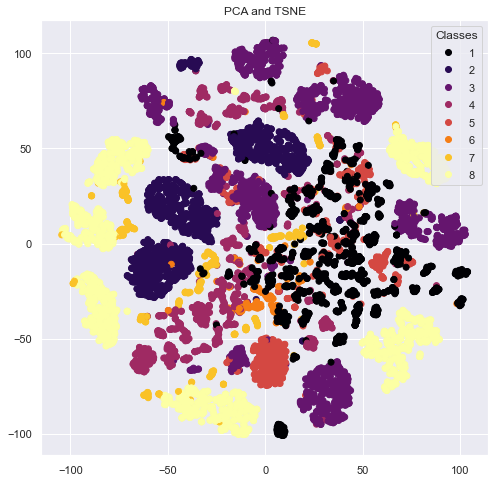

In [8]:
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1],c=new_test[:,-2], cmap='inferno')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and TSNE')

# UMAP for dimension reduction

In [9]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=10, a = 0.5, b = 1.2)
embedding = reducer.fit_transform(x_pca)
embedding.shape

(10863, 2)

Text(0.5, 1.0, 'PCA and UMAP')

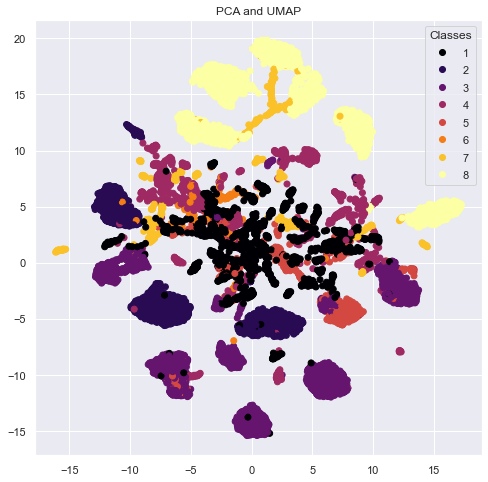

In [10]:
plt.figure(figsize=(8,8))

plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=new_test[:,-2], cmap='inferno')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and UMAP')